In [ ]:
# Hi everyone
# today we are going to analysze the heart disease dataset

### Importing Libraries and Datasets

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import seaborn as sns

### Importing data and checking the first 5 rows of the dataset

In [4]:
heart_df = pd.read_csv("C:/Users/lenovo/Downloads/archive/heart.csv")
print(heart_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


### Checking the Datatypes of the columns

In [6]:
heart_df.shape

(1025, 14)

In [7]:
print(heart_df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


### Check the info about the dataset

In [9]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Let us undertsnad the values a bit better

-age: age of people in the dataset
-sex: gender of people in the dataset
-cp: chest pain type. this is divided into 4 values
     value 0: typical angina     
value 1: atypical angina     
value 2: non-anginal pai     n
value 3: asymptoma
-trestbps: resting blood pressure (in mm Hg)-
chol: serum cholestrol in mg/dl-
fbs (fasting blood sugar> 120 mg/e-)
restecg: resting electrocardiographic resu. it is divided into 3 valuesl     ts
value 0: nor     mal
value 1: having ST-T wave abnorm5      mV)
value 2: showing probable or definite left ventricular hypertrophy by Estes' cri-teria
thalach: maximum heart rate ac-hieved
exang: exercise induced angina (1=yes-; 0=no)
oldpeak = ST depression induced by exercise relative- to rest
slope: the slope of the peak exercise . it is divided into 3 valuesS    T segment
value 1:     upsloping
va    lue 2: flat
value 3-: downloping
ca: number of major vessels (0-3) colored -by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = rev-ersable defect
target: 0=less chance of heart attack, 1 = more chance of heart attacktic

#### describing the data

In [19]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Checking for null values in the dataset

In [55]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Checkind for duplicates and dropping duplicates

In [61]:
heart_df.duplicated().any()

False

In [57]:
# Dropping duplicates
heart_df = heart_df.drop_duplicates()

### Lets show the correlation among variables using a  heatmap

<Axes: >

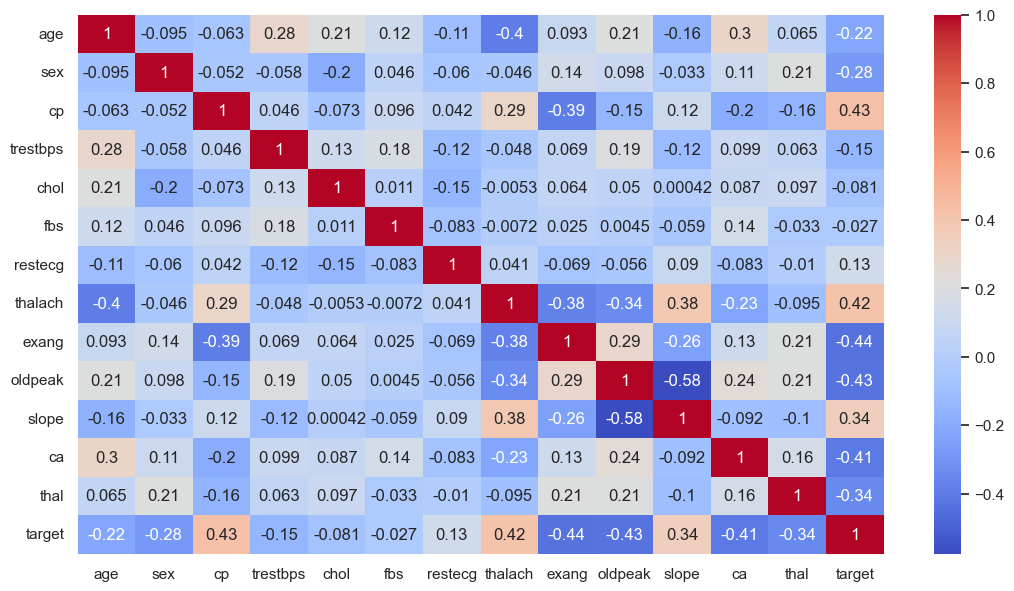

In [63]:
corri = heart_df.corr()
plt.figure(figsize = (13,7))
sns.heatmap(corri, annot = True, cmap = 'coolwarm')

it is now easier to see the correlation between different variables

### People with heart disease and people without heart disease

In [67]:
heart_df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

164 people have heart disease while 138 people do not

### using a count plot to see how mant people have heart disease

([<matplotlib.axis.XTick at 0x1db9db02840>,
 [Text(0, 0, 'No Heart Disease'), Text(1, 0, 'Heart Disease')])

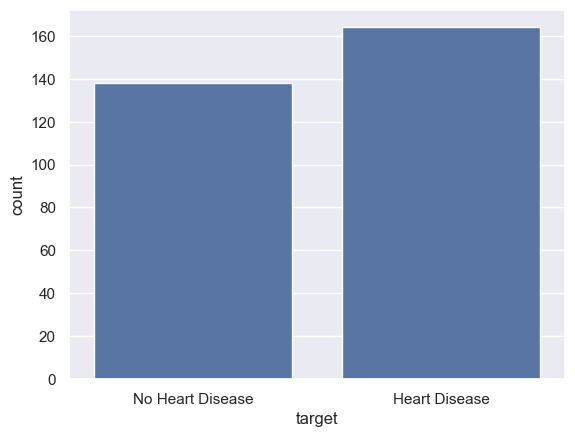

In [78]:
sns.countplot(x = heart_df['target'])
plt.xticks([0, 1],['No Heart Disease', 'Heart Disease'])

### Getting the gender distribution of the group

In [80]:
heart_df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x1db9de27ef0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

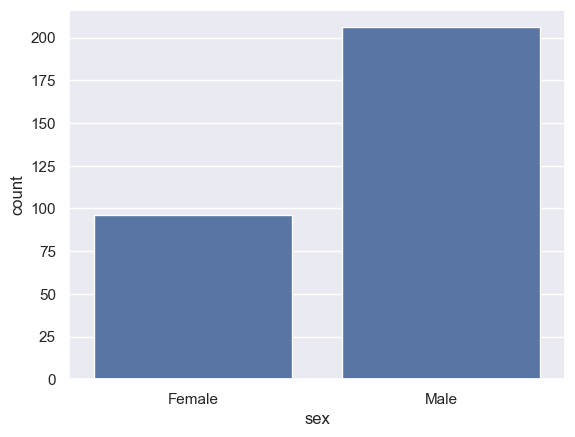

In [86]:
sns.countplot(x = heart_df['sex'])
plt.xticks([0,1], ['Female', 'Male'])

from this plot, we can see that there were more males used for in this dataset than females

### Lets find the gender distribution according to the target variable


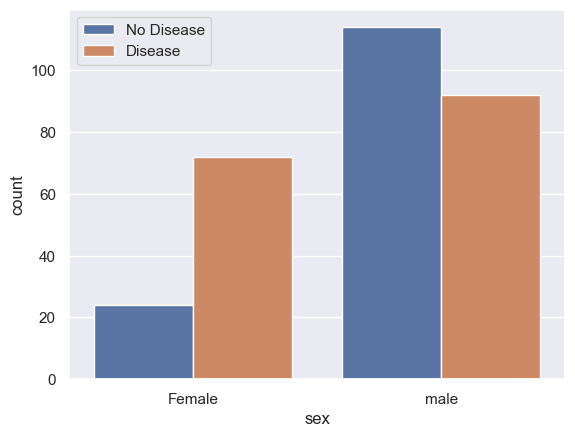

In [137]:
sns.countplot(x = 'sex', hue = 'target', data = heart_df)
plt.xticks([0,1], ['Female', 'male'])
plt.legend(labels = ['No Disease', 'Disease'])

from this distribution, we can see that there are more men for disease and non disease target than women

### Let us check the age distribution in the dataset

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10556\2912345068.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_df['age'], bins = 20)


<Axes: xlabel='age', ylabel='Density'>

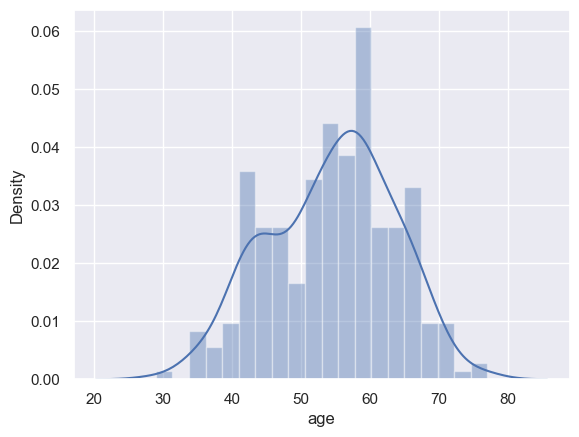

In [111]:
sns.distplot(heart_df['age'], bins = 20)

We can now see that most of the people in this study are aged between 50-60 years

### Let us look at the most common form of chestpain
the chest pain type is divided into four different valuse which include:
- 0: typical angina
- 1: atypical angina
- 2: non-tipycal angina
- 3: asymtomatic

Text(0.5, 0, 'Chest Pain')

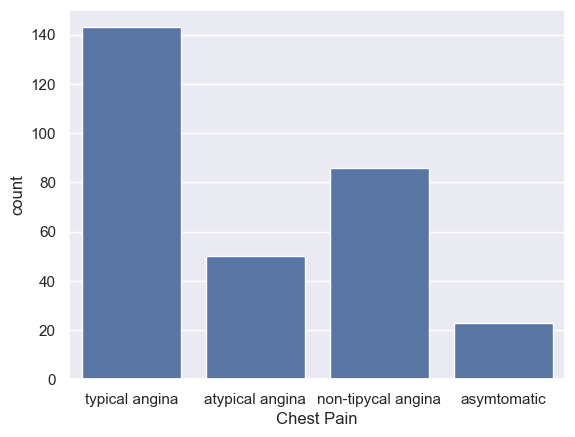

In [122]:
sns.countplot(x = heart_df['cp'])
plt.xticks([0,1,2,3],['typical angina', 'atypical angina', 'non-tipycal angina', 'asymtomatic'])
plt.xticks(rotation=0)
plt.xlabel('Chest Pain')

### Let us show the chest pain distribution by target variable

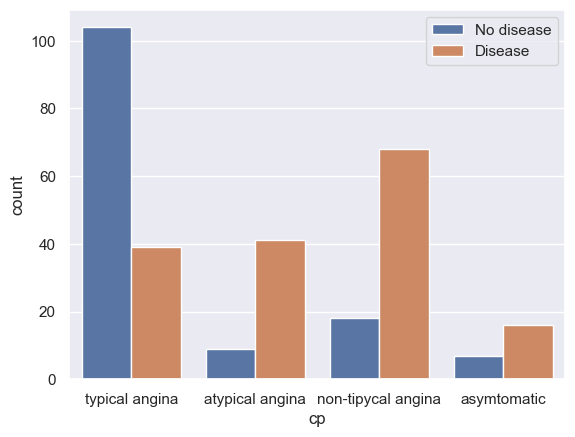

In [135]:
sns.countplot(x = 'cp', hue = 'target', data = heart_df)
plt.xticks([0,1,2,3],['typical angina', 'atypical angina', 'non-tipycal angina', 'asymtomatic'])
plt.legend(labels = ['No disease', 'Disease'])

From this graph, we know that even healty people have chest pain
this could be due to different factors like physical stress

### Fasting blood sugar distribution as per target variable


([<matplotlib.axis.XTick at 0x1dba2683650>,
 [Text(0, 0, 'No disease'), Text(1, 0, 'Disease')])

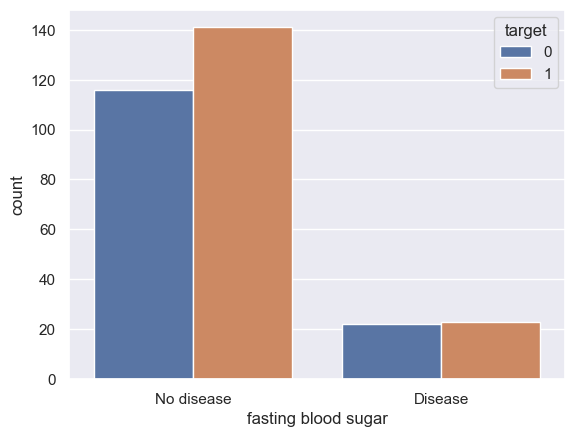

In [150]:
sns.countplot(x = 'fbs', hue = 'target', data = heart_df)
plt.xlabel('fasting blood sugar')
plt.xticks([0,1], ['No disease', 'Disease'])

# checking the resting blood pressure distribution 

<Axes: >

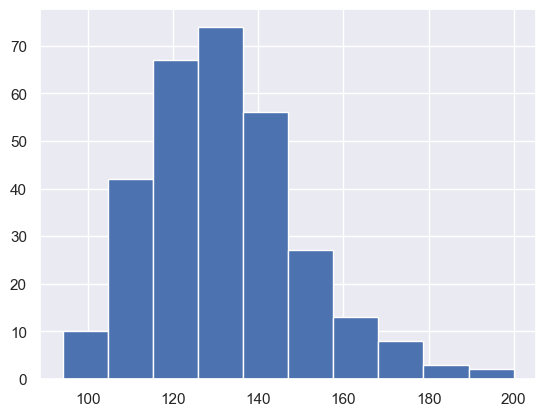

In [154]:
heart_df['trestbps'].hist()

the resting blood pressure of the people in this study are mostly between 120 and I40

In [ ]:
### compare resting blood pressure as per sex


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


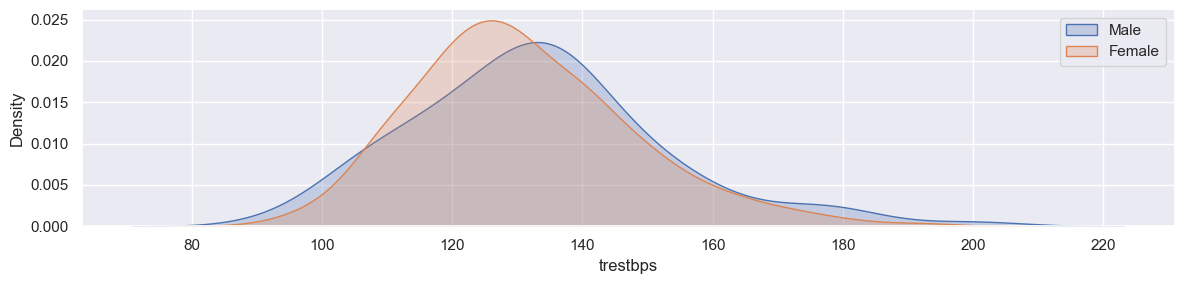

In [167]:
g = sns.FacetGrid(heart_df, hue = 'sex', aspect = 4)
g.map(sns.kdeplot, 'trestbps', shade = True)
plt.legend(labels = ['Male', 'Female'])

we can see that women have a lower resting blood pressure than me
for mean it is around 140 and for women it is around 120

### let us check the distribution of serum cholestorol

In [8]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### distribution on serum Cholesterol 

<Axes: >

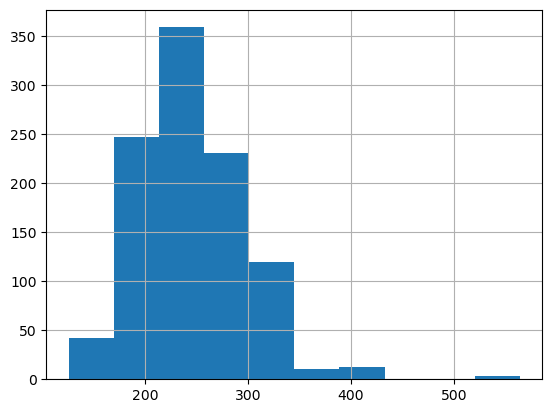

In [21]:
heart_df['chol'].hist()

### Plotting countious variables

instead of plotting histogrms over and over again, it would be easier to plot all of them at ounce

In [30]:
categ_val = []
cont_val = []

for i in heart_df.columns:
    if heart_df[i].nunique() <=10:
        categ_val.append(i)
    else:
        cont_val.append(i)

any variable with values less than 10 have been appended to the cate_val list whichh represent categorical data
and any value with a variable with values greater than 10 have been put into the cont_val list wich represents continous data

In [34]:
categ_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [37]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

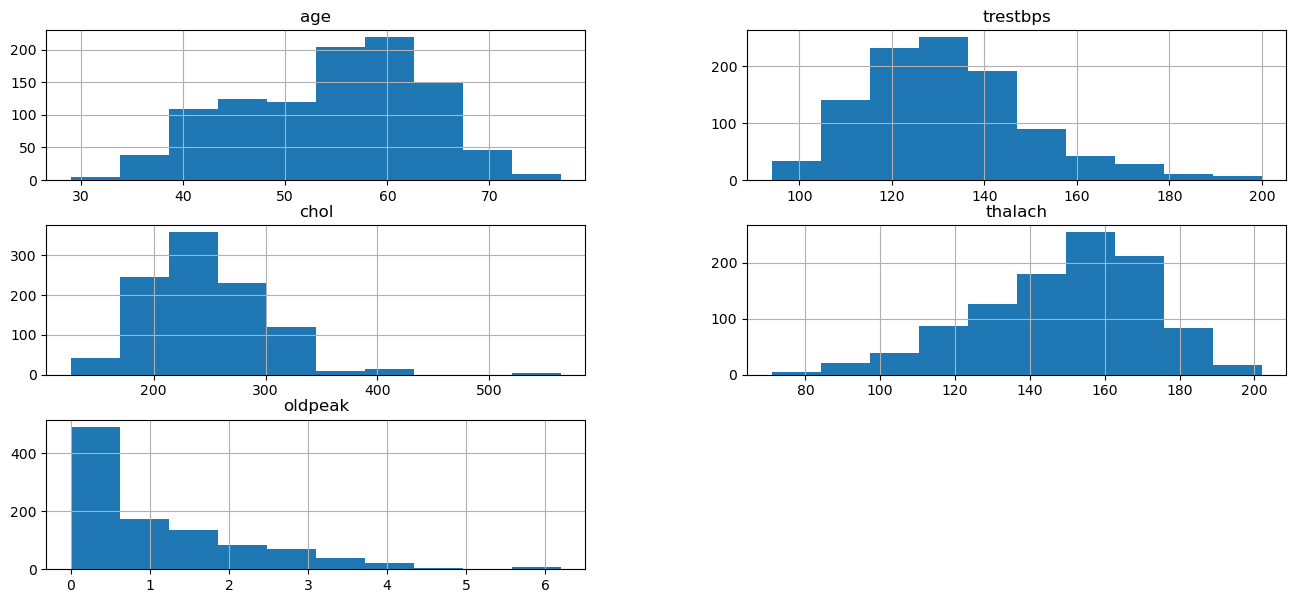

In [41]:
heart_df.hist(cont_val, figsize = (16,7))

The distribution for each value is shown

Based on the analysis of the heart disease dataset, several key observations can be made:

1. Gender Distribution: The dataset reveals a higher prevalence of heart disease among men compared to women, as well as a larger number of men in both the disease and non-disease categories. This may suggest that men in this population are at a higher risk of developing heart disease compared to women.

2. Age Range: The majority of individuals in the study are aged between 50-60 years, indicating that this age group is particularly relevant when considering the risk factors for heart disease. This aligns with common findings in cardiology, where the risk of heart disease increases with age.

3. Chest Pain Observations: It is noted that even healthy individuals experience chest pain, which can stem from factors such as physical stress. This underscores the importance of distinguishing between chest pain caused by heart-related conditions and other non-cardiac causes when assessing cardiovascular health.

4. Resting Blood Pressure: The analysis shows a significant difference in resting blood pressure between men and women, with men having a higher average resting blood pressure (around 140 mmHg) compared to women (around 120 mmHg). This difference may be indicative of varying cardiovascular risk factors between genders, and could point to the need for gender-specific approaches in managing blood pressure and heart disease risk.

### Conclusion

Conclusion:
The findings highlight the significant role of age, gender, and blood pressure in heart disease risk, with men being more affected overall and a higher concentration of cases in the 50-60 age range. Additionally, the difference in resting blood pressure between genders suggests that men may face higher risks of cardiovascular complications. These insights emphasize the need for targeted interventions and further investigation into the specific factors contributing to heart disease across different demographic groups. Further research could also explore the complex relationship between chest pain, stress, and heart disease, especially in healthy individuals.